In [34]:
import seaborn as sns
import pandas as pd
pd.__version__

'0.23.4'

In [60]:
df = pd.read_csv('/home/tasneem/Downloads/train.csv')
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [11]:
df.shape

(33126, 8)

In [12]:
df.info()
# missing data check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
image_name                       33126 non-null object
patient_id                       33126 non-null object
sex                              33061 non-null object
age_approx                       33058 non-null float64
anatom_site_general_challenge    32599 non-null object
diagnosis                        33126 non-null object
benign_malignant                 33126 non-null object
target                           33126 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [28]:
df['benign_malignant'].value_counts()

benign       32542
malignant      584
Name: benign_malignant, dtype: int64

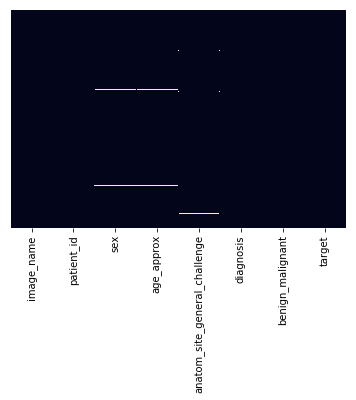

In [33]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [27]:
subset = df.loc[:,['image_name','benign_malignant','target']]
subset.head()

,image_name,benign_malignant,target
0,ISIC_2637011,benign,0
1,ISIC_0015719,benign,0
2,ISIC_0052212,benign,0
3,ISIC_0068279,benign,0
4,ISIC_0074268,benign,0


In [52]:
subset['benign'] = (~subset['target'] ) 
subset['malignant'] = (subset['target'] ) 

subset.loc[subset['benign_malignant'] == 'benign', ['benign', 'malignant']] = [1,0]
subset.loc[subset['benign_malignant'] == 'malignant', ['benign', 'malignant']] = [0,1]

subset

,image_name,benign_malignant,target,benign,malignant
0,ISIC_2637011,benign,0,1,0
1,ISIC_0015719,benign,0,1,0
2,ISIC_0052212,benign,0,1,0
3,ISIC_0068279,benign,0,1,0
4,ISIC_0074268,benign,0,1,0
5,ISIC_0074311,benign,0,1,0
6,ISIC_0074542,benign,0,1,0
7,ISIC_0075663,benign,0,1,0
8,ISIC_0075914,benign,0,1,0
9,ISIC_0076262,benign,0,1,0


In [53]:
train_tidy = subset.loc[:,['image_name','benign','malignant']]
train_tidy.head()

,image_name,benign,malignant
0,ISIC_2637011,1,0
1,ISIC_0015719,1,0
2,ISIC_0052212,1,0
3,ISIC_0068279,1,0
4,ISIC_0074268,1,0


In [55]:
train_tidy.to_csv('/home/tasneem/Downloads/train_tidy.csv', index=False)

In [61]:
df = pd.read_csv('/home/tasneem/Downloads/test.csv')
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [62]:
df.shape

(10982, 5)

In [64]:
test_tidy = df.loc[:,['image_name']]
test_tidy.head()

,image_name
0,ISIC_0052060
1,ISIC_0052349
2,ISIC_0058510
3,ISIC_0073313
4,ISIC_0073502


In [65]:
test_tidy.to_csv('/home/tasneem/Downloads/test_tidy.csv', index=False)